# Predicting cost of insurance

In this project, I worked on developing an end to end machine learning project using linear regression. Data cleaning, Extensive data visulaization, Exploratory data analysis was also done.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
Insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
Insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
Insurance.shape

(1338, 7)

# Data cleaning and preparation

In [8]:
#checking for null values
Insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
#checking for duplicates
Insurance.duplicated().any()

True

The data had no null values, but they were duplicates. Due to the nature of the data, these duplicates will not be removed.

# Exploratory Data Analysis

<AxesSubplot:>

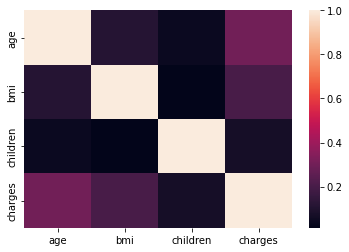

In [10]:
#building the correlation matrix

sns.heatmap(Insurance.corr())

Using heatmap to check the correletaion that exists between the numeric data. This heatmap shows there is little to no correlation between "age" and "charges".

C:\Users\Obisesan Funmilola\newfolder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

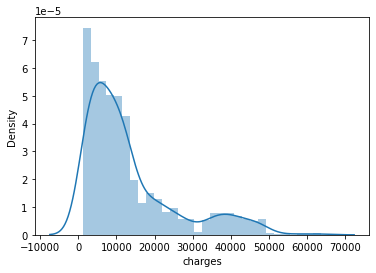

In [11]:
#Checking the distribution of "charges"
sns.distplot(Insurance['charges'])

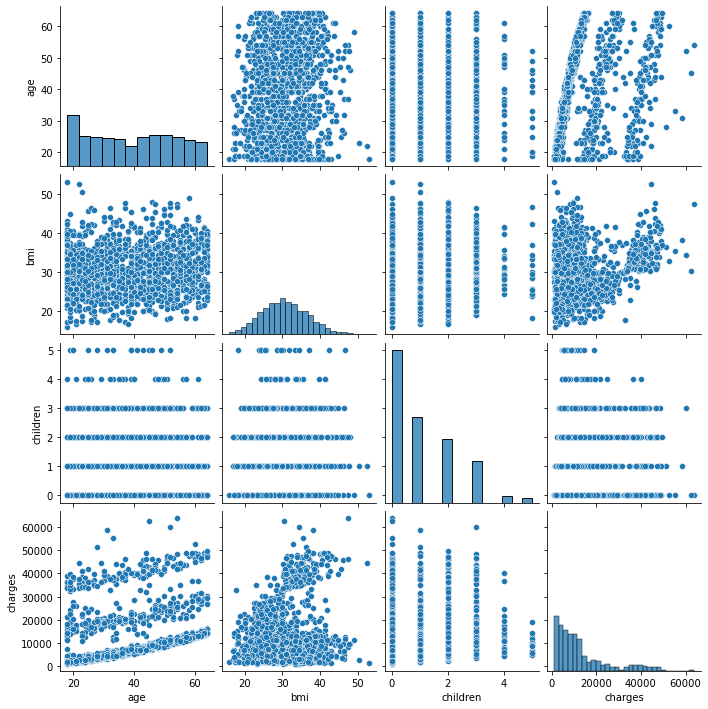

In [12]:
#A pairplot to check out the data
sns.pairplot(Insurance);

# Extracting dependent and independent variables

In [13]:
X = Insurance.drop(columns = ["charges"])
X.head(5)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [14]:
y = Insurance["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Spliting the dataset
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
X_train.head()

,age,sex,bmi,children,smoker,region
621,37,male,34.100,4,yes,southwest
194,18,male,34.430,0,no,southeast
240,23,female,36.670,2,yes,northeast
1168,32,male,35.200,2,no,southwest
1192,58,female,32.395,1,no,northeast


In [32]:
y_train.head()

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
Name: charges, dtype: float64

In [31]:
assert(len(X_train) == len(y_train))

# One hot encoding to transform categorical text data

In [48]:
X_train_ = pd.get_dummies(X_train, columns=["sex", "smoker", "region"], drop_first=True)

In [49]:
X_test_ = pd.get_dummies(X_test, columns=["sex", "smoker", "region"], drop_first=True)
X_test_.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,52,30.200,1,1,0,0,0,1
610,47,29.370,1,0,0,0,1,0
569,48,40.565,2,1,1,1,0,0
1034,61,38.380,0,1,0,1,0,0
198,51,18.050,0,0,0,1,0,0


In [50]:
X_train_.dtypes

age                   int64
bmi                 float64
children              int64
sex_male              uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

# Building and fitting the model¶

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train_,y_train)

LinearRegression()

# Predicting the ''test'' set result

In [54]:
predictions = lm.predict(X_test_)

predictions

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

# Model Evaluation


In [55]:
# print the intercept
print(lm.intercept_)

-11828.073537474762


In [58]:
#calculating the coefficient
print(lm.coef_)

[ 2.53700500e+02  3.35962814e+02  4.36910121e+02 -1.54637279e+01
  2.36050173e+04 -2.60132732e+02 -9.13278834e+02 -7.61948706e+02]


# Regression evaluation metrics

In [56]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3933.272649405234
MSE: 31827950.22952383
RMSE: 5641.626558850189


In [57]:
#calculating the R squared value

from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7999876970680434

   A fairly good model performance. 